In [2]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

In [3]:
# Printing a PersistenceImager() object will print its defining attributes
pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))
print(pimgr)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [4]:
# PersistenceImager() attributes can be adjusted at or after instantiation.
# Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes.
pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 2)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.0, 2.0), pers_range=(0.0, 1.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(20, 10)


In [5]:
# The `fit()` method can be called on one or more (*,2) numpy arrays to automatically determine the miniumum birth and
# persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to
# accomodate the specified pixel size.
pimgr = PersistenceImager(pixel_size=0.5)
pdgms = [np.array([[0.5, 0.8], [0.7, 2.2], [2.5, 4.0]]),
         np.array([[0.1, 0.2], [3.1, 3.3], [1.6, 2.9]]),
         np.array([[0.2, 1.5], [0.4, 0.6], [0.2, 2.6]])]
pimgr.fit(pdgms, skew=True)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.1, 3.1), pers_range=(-8.326672684688674e-17, 2.5), pixel_size=0.5, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(6, 5)


In [6]:
# The `transform()` method can then be called on one or more (*,2) numpy arrays to generate persistence images from diagrams.
# The option `skew=True` specifies that the diagrams are currently in birth-death coordinates and must first be transformed
# to birth-persistence coordinates.
pimgs = pimgr.transform(pdgms, skew=True)
pimgs[0]

array([[0.03999068, 0.05688393, 0.06672051, 0.06341749, 0.04820814],
       [0.04506697, 0.06556791, 0.07809764, 0.07495246, 0.05730671],
       [0.04454486, 0.06674611, 0.08104366, 0.07869919, 0.06058808],
       [0.04113063, 0.0636504 , 0.07884635, 0.07747833, 0.06005714],
       [0.03625436, 0.05757744, 0.07242608, 0.07180125, 0.05593626],
       [0.02922239, 0.04712024, 0.05979033, 0.05956698, 0.04653357]])

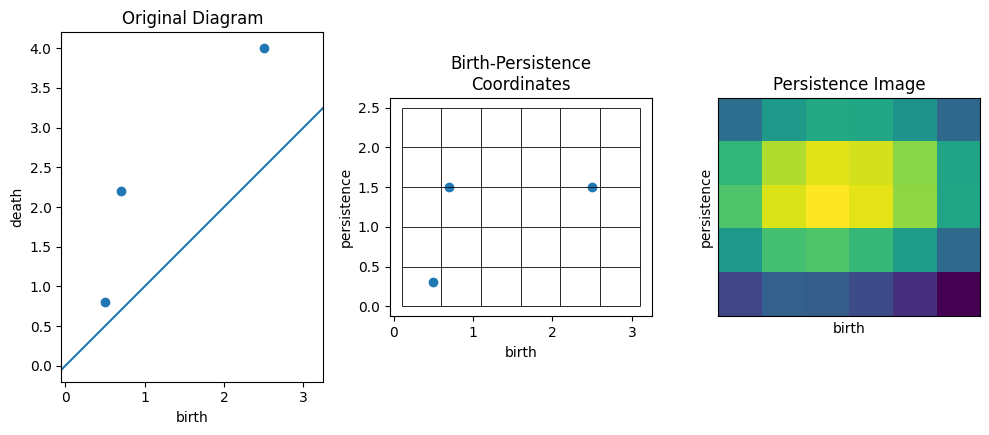

In [7]:
# The `plot_diagram()` and `plot_image()` methods can be used to visualize persistence diagrams and images
fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(pdgms[0], skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(pdgms[0], skew=True, ax=axs[1])

axs[2].set_title("Persistence Image")
pimgr.plot_image(pimgs[0], ax=axs[2])

plt.tight_layout()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


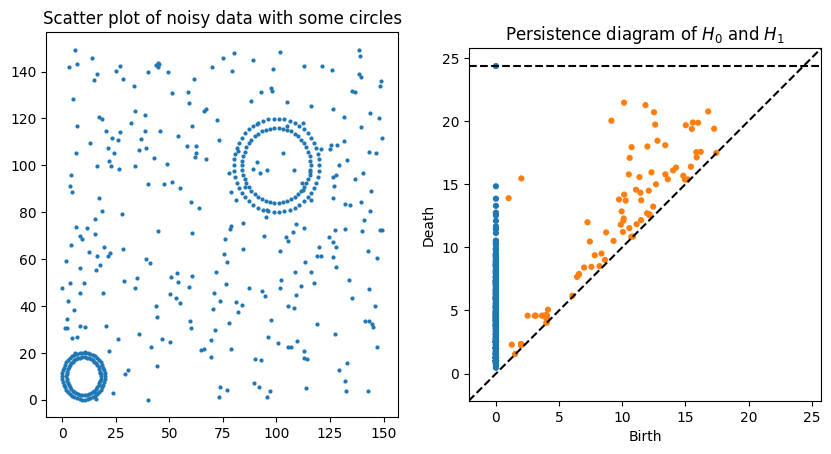

In [8]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

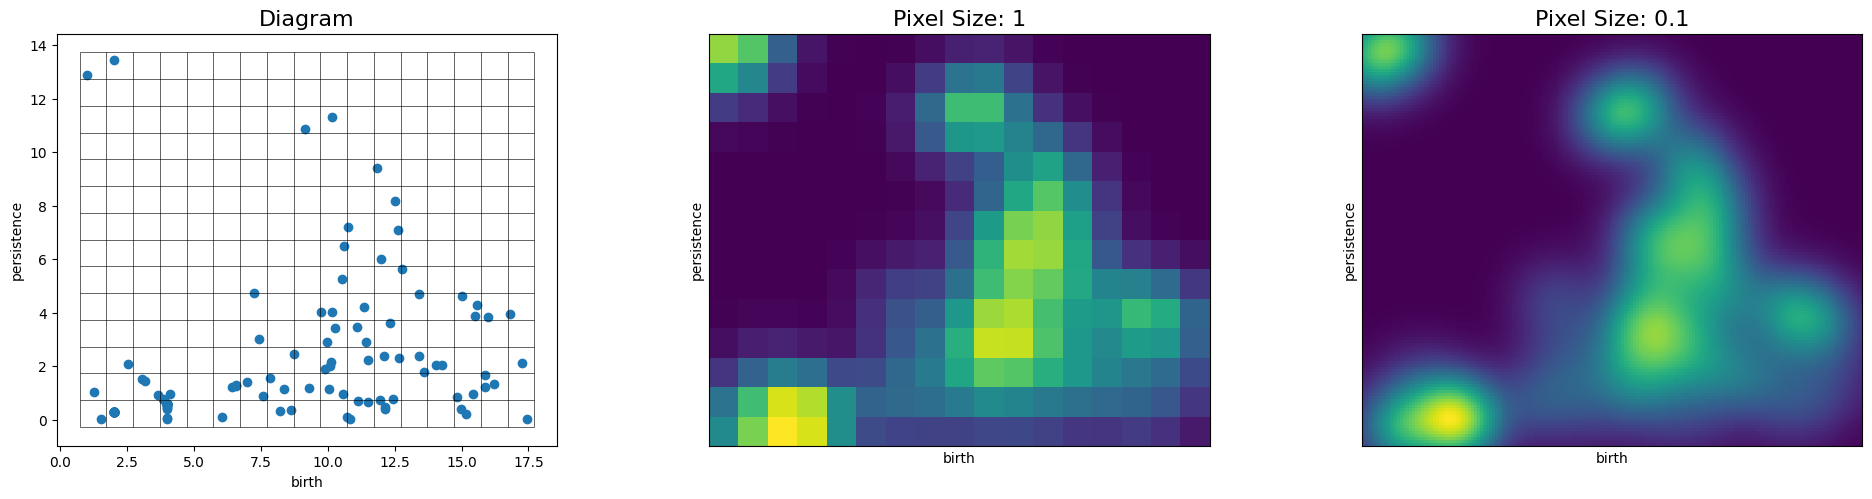

In [9]:
# The resolution of the persistence image is adjusted by choosing the pixel size, given in the same units as the diagram
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()

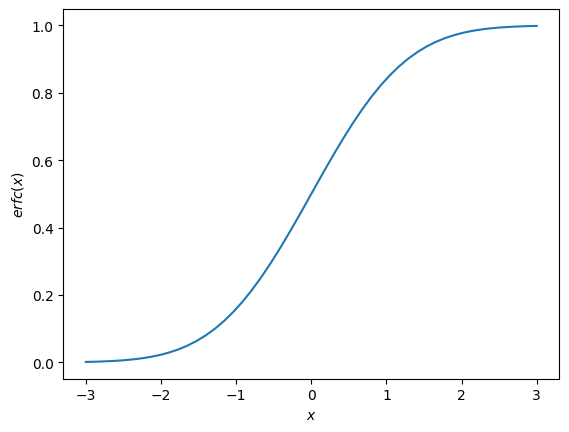

In [10]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
plt.plot(x, special.erfc(-x / np.sqrt(2.0)) / 2.0)
plt.xlabel('$x$')
plt.ylabel('$erfc(x)$')
plt.show()

In [11]:
def norm_cdf(x):
    return special.erfc(-x / np.sqrt(2.0)) / 2.0

In [12]:
def persistence(birth, pers, n=1.0):
    return pers ** n

In [20]:
pers_dgm = np.copy(H1_dgm)
pers_dgm[:, 1] = pers_dgm[:, 1] - pers_dgm[:, 0]
pixel_size = .01
birth_range = [min(pers_dgm[:,0]), max(pers_dgm[:,0])]
pers_range = [min(pers_dgm[:,1]), max(pers_dgm[:,1])]

width = birth_range[1] - birth_range[0]
height = pers_range[1] - pers_range[0]
resolution = (int(width/pixel_size), int(height/pixel_size))
pers_img = np.zeros(resolution)
n = pers_dgm.shape[0]


bpnts = np.linspace(birth_range[0], birth_range[1] + pixel_size,
                                           resolution[0] + 1, endpoint=False, dtype=np.float64)
ppnts = np.linspace(pers_range[0], pers_range[1] + pixel_size,
                                           resolution[1] + 1, endpoint=False, dtype=np.float64)



wts = persistence(pers_dgm[:, 0], pers_dgm[:, 1])
sigma = 1
sigma = np.array([[sigma, 0.0], [0.0, sigma]], dtype=np.float64)
sigma = np.sqrt(sigma[0][0])

In [21]:
for i in range(n):
    ncdf_b = norm_cdf((bpnts - pers_dgm[i, 0]) / sigma)
    ncdf_p = norm_cdf((ppnts - pers_dgm[i, 1]) / sigma)
    curr_img = ncdf_p[None, :] * ncdf_b[:, None]
    pers_img += wts[i]*(curr_img[1:, 1:] - curr_img[:-1, 1:] - curr_img[1:, :-1] + curr_img[:-1, :-1])

pers_img

array([[1.46541834e-04, 1.47071368e-04, 1.47589197e-04, ...,
        3.07276612e-04, 3.06342797e-04, 3.05383629e-04],
       [1.48024657e-04, 1.48559612e-04, 1.49082747e-04, ...,
        3.08556424e-04, 3.07622965e-04, 3.06664024e-04],
       [1.49509910e-04, 1.50050307e-04, 1.50578766e-04, ...,
        3.09818220e-04, 3.08885212e-04, 3.07926595e-04],
       ...,
       [1.57554540e-05, 1.59798564e-05, 1.62062842e-05, ...,
        1.14361160e-14, 1.03181993e-14, 8.36455200e-15],
       [1.55727352e-05, 1.57948655e-05, 1.60190087e-05, ...,
        8.36455200e-15, 9.27263029e-15, 1.05280377e-14],
       [1.53913623e-05, 1.56112321e-05, 1.58331022e-05, ...,
        8.01722286e-15, 8.22706129e-15, 8.22706129e-15]])

<Axes: xlabel='birth', ylabel='persistence'>

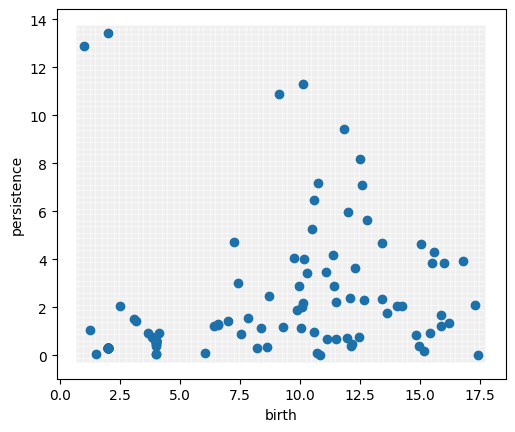

In [22]:
pimgr.plot_diagram(H1_dgm)

<Axes: xlabel='birth', ylabel='persistence'>

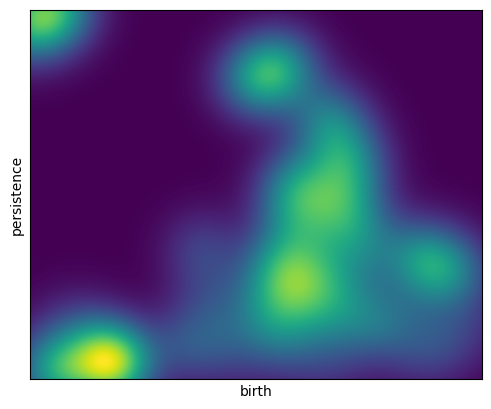

In [23]:
pimgr = PersistenceImager(pixel_size=.01)
pimgr.plot_image(pers_img)

In [24]:
def img_transform(pers_dgm, ps=.2):
    pers_dgm = np.copy(pers_dgm)
    pers_dgm[:, 1] = pers_dgm[:, 1] - pers_dgm[:, 0]
    pixel_size = ps
    birth_range = [min(pers_dgm[:,0]), max(pers_dgm[:,0])]
    pers_range = [min(pers_dgm[:,1]), max(pers_dgm[:,1])]

    width = birth_range[1] - birth_range[0]
    height = pers_range[1] - pers_range[0]
    resolution = (int(width/pixel_size), int(height/pixel_size))
    pers_img = np.zeros(resolution)
    n = pers_dgm.shape[0]


    bpnts = np.linspace(birth_range[0], birth_range[1] + pixel_size,
                                            resolution[0] + 1, endpoint=False, dtype=np.float64)
    ppnts = np.linspace(pers_range[0], pers_range[1] + pixel_size,
                                            resolution[1] + 1, endpoint=False, dtype=np.float64)



    wts = persistence(pers_dgm[:, 0], pers_dgm[:, 1])
    sigma = 1
    sigma = np.array([[sigma, 0.0], [0.0, sigma]], dtype=np.float64)
    sigma = np.sqrt(sigma[0][0])
    for i in range(n):
        ncdf_b = norm_cdf((bpnts - pers_dgm[i, 0]) / sigma)
        ncdf_p = norm_cdf((ppnts - pers_dgm[i, 1]) / sigma)
        curr_img = ncdf_p[None, :] * ncdf_b[:, None]
        pers_img += wts[i]*(curr_img[1:, 1:] - curr_img[:-1, 1:] - curr_img[1:, :-1] + curr_img[:-1, :-1])

    return pers_img


In [25]:
import collections
def ensure_iterable(pers_dgms):
    # if first entry of first entry is not iterable, then diagrams is singular and we need to make it a list of diagrams
    try:
        singular = not isinstance(pers_dgms[0][0], collections.Iterable)
    except IndexError:
        singular = False

    if singular:
        pers_dgms = [pers_dgms]
        
    return pers_dgms, singular

In [26]:
from joblib import Parallel, delayed
def transform(pers_dgms, ps=.2, n_jobs=None):
    if n_jobs is not None:
        parallelize = True
    else:
        parallelize = False
    
    # convert to a list of diagrams if necessary 
    pers_dgms, singular = ensure_iterable(pers_dgms)
    
    if parallelize:
        pers_imgs = Parallel(n_jobs=n_jobs)(delayed(img_transform)(pers_dgm, ps) for pers_dgm in pers_dgms)
    else:
        pers_imgs = [img_transform(pers_dgm, ps) for pers_dgm in pers_dgms]
    
    if singular:
        pers_imgs = pers_imgs[0]
    
    return pers_imgs

In [34]:
import time
num_diagrams = 10000
min_pairs = 50
max_pairs = 100

dgms = [np.random.rand(np.random.randint(min_pairs, max_pairs), 2) for _ in range(num_diagrams)]


start_time = time.time()
transform(dgms, .1)
print("Execution time in serial: %g sec." % (time.time() - start_time))

Execution time in serial: 8.81214 sec.


In [36]:
start_time = time.time()
transform(dgms, .1, n_jobs=-1)
print("Execution time in parallel: %g sec." % (time.time() - start_time))

Execution time in parallel: 2.47634 sec.
